# Projeto de Detecção de Fraude em Cartão de Crédito

## 1. Contextualização

Para começar, devemos definir o objetivo do projeto e compreender nosso contexto de negócio. Todas as decisões tomadas nas etapas seguintes são consistentes com nossos objetivos.

A instituição financeira S.A Banco é uma das maiores empresas do mercado financeiro na Ámerica do Sul. Muitos usuários utilizam o serviço de pagamento por cartão de crédito diariamente. Por questões de segurança quando uma transação é realizada o S.A. Banco avalia se aquela transação apresenta indícios de ser fraudulenta.

Esse processo era realizado de forma manual, porém com o crescimento exponencial da implementação de soluções de aprendizado de máquina para classificação a instituição tentou implementar um modelo de machine learning. Porém, o modelo desenvolvido não parece se comportar bem na prática. O time de dados não entende ao certo qual pode ser a razão para os resultados insatisfatórios do modelo.

O S.A. Banco contratou a gente para o desenvolvimento de um novo modelo capaz de entregar melhores resultados para a instituição. Esse projeto é fundamental para o desenvolvimento do banco, tem potencial para evitar muitas perdas financeiras para o banco e de valor para o cliente.

### 1.1. Situação Problema


Uma transação fraudulenta ser autorizada gera perdas monetárias para a instituição financeira. Além disso, existe uma perda de valor para o cliente, uma vez que a instituição não é capaz de evitar esse tipo de problema. Portanto, esse é um tópico importante para reduzir essas perdas financeiras e também para a retenção dos clientes. Para manter seus clientes satisfeitos com o tempo, você deve entender suas necessidades, fornecer um excelente serviço ao cliente e entender porque eles deixariam sua empresa.

Vale observar que a não autorização de uma transação normal, dado uma classificação errada como sendo fradulenta, também pode impactar a confiança do cliente em relação a instituição. Muitas vezes a classificação como uma transação fraudulenta significa bloquear o cartão de crédito do cliente. Isso levará a insatisfação com a empresa se ocorrer de forma frequente devido ao tempo que o cliente terá que gastar para contatar o S.A. Banco e desbloquear seu cartão. Pode ser que o cliente precise realizar a transação em carater emergencial e um bloqueio por parte do banco pode levar a problemas ainda mais graves, podendo chegar inclusive as esferas jurídicas.

Fica claro que qualquer tipo de erro é um problema sério para a instituição. Cabe a nós decidir qual tipo de erro é menos danoso para a instituição. Essa decisão normalmente tem como base estratégia, modelo de negócios da instituição, perfil do público e stakeholders.

Portanto, o problema que será abordado aqui pode ser descrito então como:

> Desenvolver um modelo de ML que seja capaz de identificar as transições fraudulentas da melhor forma possível considerando o contexto de negócios do S.A. Banco. Esse modelo será validado e desenvolvido posteriormente em conjunto com a equipe de dados do S.A. Banco.

Esse é um problema bastante comum na área de ciência de dados. Uma característica forte do problema é que o balanceamente entre as classes do conjunto de dados é muito desequilibrado. Em outras palavras, temos muitas transações normais e poucas transações fraudulentas.

#### 1.1.1. Contextualização do conjunto de dados

O conjunto de dados contém transações feitas por cartões de crédito em setembro de 2013 pelos titulares de cartões de crédito. Este conjunto de dados apresenta as transações que ocorreram em dois dias, onde temos 492 fraudes em 284.807 transações. O conjunto de dados é altamente desequilibrado, a classe positiva (fraudes) responde por 0,172% de todas as transações.

Ele contém apenas variáveis numéricas de entrada que são o resultado de uma transformação do PCA. Infelizmente, devido a questões de confidencialidade, não temos os atributos originais e mais informações de fundo sobre os dados. As características V1, V2, … V28 são os principais componentes obtidos com PCA, os únicos atributos que não foram transformadas com PCA são Tempo e Montante.

O atributo Tempo contém os segundos transcorridos entre cada transação e a primeira transação no conjunto de dados. O atributo Montante é o valor da transação, este atributo pode ser usado, por exemplo, para aprendizagem sensível aos valores das transações. O atributo Classe é nosso target e tem valor 1 em caso de fraude e 0 em caso contrário.

### 1.2. Métricas

Para a avaliação do modelo de aprendizagem da máquina, a seleção das métricas apropriadas é fundamental. A questão é que a classe de transições fraudulentas é desequilibrada devido à distribuição desigual do conjunto de dados. **Na situação de classes desiguais, a métrica "accuracy" é enganosa e não deve ser usada**. Em vez disso, vamos empregar métricas como "precision" e "recall". Precision indica a porcentagem de transações fraudulentas que identificamos com sucesso entre todas as transações fraudulentas, enquanto que o recall indica a porcentagem de transações fraudulentas que identificamos com sucesso entre todas transações fraudulentas:

> precision = $\frac{TP}{TP+FP}$

> recall = $\frac{TP}{TP+FN}$

Os Verdadeiros positivos (TP) são transações fraudulentas corretamente identificados, os falsos positivos (FP) são transações normais incorretamente identificadas como fraudulentas, e os falsos negativos (FN) são transações fraudulentas incorretamente identificadas como transações normais.

Na maioria dos casos, as classes não são distribuídas de maneira uniforme. Haverá sempre uma zona cinza onde as classes são misturadas, pois nem sempre podemos diferenciar claramente todos os pontos de uma classe positiva de todos os pontos de uma classe negativa. Como resultado, existe uma relação inversa entre precisão e recall: o aumento de um parâmetro (precisão ou recall) diminui o outro (recall ou precisão). Esse é o trade-off recall-precision.

**Como foi apresentado anteriormente os dois tipos de erros (FN e FP) são ruins para o S.A. Banco**. **Como não temos acesso a estratégia de negócio da instituição financeira que poderia ajudar na tomada de decisão em relação a métrica principal que será analisada, não podemos nos concentrar em uma postura de negócio específica**. Talvez um estudo que fosse capaz de quantificar de alguma forma qual tipo de erro seria pior para a organização poderia ajudar nessa decisão também. Claramente, o pensamento mais linear levaria a priorizar o Recall, porém acho que é melhor não substimar os danos que o outro tipo de erro pode trazer também.

**Nosso estudo não está focado em uma instituição financeira que está disposta a reduzir transações fraudulentas a qualquer custo, não importando quantas transações normais identificamos como fraudulentas (precision baixa), desde que incluamos todas as transações fraudulentas (recall alto). O S.A. Banco quer identificar o máximo possível de transações fraudulentas gerando pouco transtorno para os clientes (precision alta e recall alto)**, e para isso é importante que  se importar com a presença de transações normais classificadas como fraudulentas.

**Como ambas métricas são importantes. Nem muitos falsos positivos nem muitos falsos negativos são desejáveis. F1-score que é definida abaixo pode ser interessante para nós**.

> F1 = $2 * \frac{precision*recall}{precision+recall}$

F1 é a média harmônica entre precisão e recall. Ela combina as duas métricas em uma única métrica que lhes dá o mesmo peso.

### 1.3. Objetivos & Requisitos

O objetivo do projeto é atingir 0,90 de F1-score. Também ficaremos satisfeitos com um valor um pouco mais baixo, mas não ficaremos satisfeitos com um valor abaixo de 0,80.

### 1.4. Abordagem adotada

Nosso trabalho é explorar o conjunto de dados e seus atributos de modo a entender características de comportamento das transações e implementar um modelo apropriado. **As principais etapas foram**:

- *Carregar, organizar e limpar os dados*: Analisar os valores NaN, verificar os tipos de dados e remover as duplicatas.
- *EDA*: Análise exploratória dos dados para examinar as distribuições de características e correlações com as principais classes (transações fraudulentas e normais).
- *Feature Engineering*: Identificação dos atributos do conjunto de dados a serem consideradas em nosso modelo.
- *Modelagem*: Teste com diversos modelos, otimização com GridSearchCV e finalização do modelo.

## 2. Carregamento, Organização e Limpeza dos Dados

Os comentários e docstrings no código serão todos em inglês.

In [ ]:
# Importing data wrangling modules
import pandas as pd
import numpy as np

# Importing data visualization modules
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style

from collections import Counter

%matplotlib inline
%config InlineBackend.figure_format = 'png'

# Reading the dataset
df = pd.read_csv('/content/creditcard.csv')
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


Temos 31 atributos no conjunto de dados, sendo que apenas Tempo e Montante são atributos interpretáveis. Os outros atributos, V1 até V28, são oriundos de uma transformação PCA.

In [ ]:
# Provide the number of rows in the dataset
num_rows = df.shape[0]

# Provide the number of columns in the dataset
num_cols = df.shape[1]

# Print results
print("There are  {} rows and {} columns "
      "no conjunto de dados!\n".format(num_rows, num_cols))

# Overview of the dataset
df.info(verbose=False)

Temos 284807 linhas e 31 colunas no conjunto de dados!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Columns: 31 entries, Time to Class
dtypes: float64(30), int64(1)
memory usage: 67.4 MB


Todos os 31 atributos do conjunto de dados estão no formato float64. Pelos dados que foram enviados parece que temos somente variávereis numéricas e nenhuma categórica. Podemos proceder para análise de valores faltantes.

In [ ]:
# Provide the number of columns with no missing values
num_miss_col = np.sum(df.isnull().mean() == 0)

# Provide the name columns with no missing values
name_miss_cols_list = df.columns[df.isnull().mean() == 0].tolist()

# Provide the name of the columns with less than 5% of the values missing
vlow_miss_cols_list = df.columns[(df.isnull().mean() > 0)
                                        & (df.isnull().mean() < 0.05)].tolist()

# Provide the name of the columns with more than 5% and less than 10% of the values missing
low_miss_cols_list = df.columns[(df.isnull().mean() > 0.05)
                                   & (df.isnull().mean() < 0.1)].tolist()

# Provide the name of the columns with more 10% of the values missing
sig_miss_cols_list = df.columns[(df.isnull().mean() > 0.1)
                                   & (df.isnull().mean() < 1)].tolist()

# Print results
print("There are {} columns in the "
      "dataset that has no missing values".format(num_miss_col))

print("\nThe columns that have "
      "no missing values are: \n{}".format(name_miss_cols_list))

print("\nThe columns that have very low number of "
      "missing values (less than 5%) are: \n{}".format(vlow_miss_cols_list))

print("\nThe columns that a low number "
      "of missing values (less than 10%) are: \n{}".format(low_miss_cols_list))

print("\nThe columns that a significant number of "
      "missing values (more than 10%) are: \n{}".format(sig_miss_cols_list))

There are 31 columns in the dataset that has no missing values

The columns that have no missing values are: 
['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

The columns that have very low number of missing values (less than 5%) are: 
[]

The columns that a low number of missing values (less than 10%) are: 
[]

The columns that a significant number of missing values (more than 10%) are: 
[]


Não temos registros faltantes no conjunto de dados analisado.

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


A variável que chama mais atenção no conjunto de dados é o montante associado a cada transação realizada, até por ser o único atributo interessante que realmente entendemos o que significa. Fica claro pela diferença entre média e mediana (segundo quartil) e pela amplitude dos dados (máximo - mínimo) que a distribuição desse atributo é muito assimétrica.

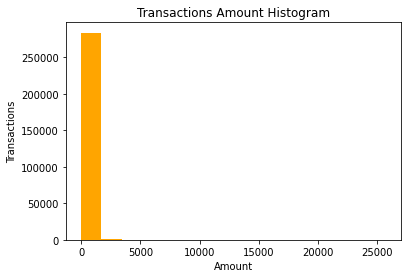

In [ ]:
plt.hist(df['Amount'], bins=15, color='#FFA500');
plt.xlabel('Amount');
plt.ylabel('Transactions')
plt.title('Transactions Amount Histogram');
plt.show()

O histograma confirma o que já sabiamos devido as métricas obtidas anteriormente. Vamos olhar como é a distribuição dos dados para montantes menores que 2500. A expectativa é que continue bastante assimétrica considerando os quartis obtidos pelo método describe().  

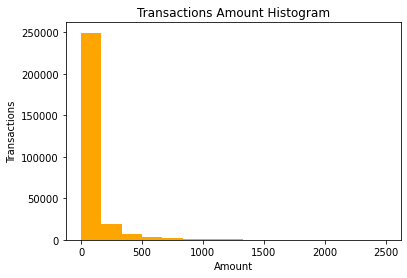

In [ ]:
aux = df[df['Amount']<2500].Amount
plt.hist(aux, bins=15, color='#FFA500');
plt.xlabel('Amount');
plt.ylabel('Transactions')
plt.title('Transactions Amount Histogram');
plt.show()

A distribuição dos valores das transações é muito assimétrica, onde uma expressiva maioria das transações estão entre 0 a 100. De certa forma é um comportamento natural e esperado dos dados. A maioria das transações que fazemos no dia a dia são valores menores.

Sobre outliers que claramente existem considerando esse atributo vale dizer que só devemos remover outliers que são registros realizados de forma errada. Apesar da maioria dos clientes realizaram mais transações com montantes menores, pode acontecer dele querer comprar algo ou precisar pagar por um serviço que é mais caro que a maioria das transações. Além disso, existem diferentes perfis de clientes, talvez tenhamos alguns clientes com um condição financeira que para eles é normal realizar transações com valores mais expressivos. Como o valor máximo do atributo é 25691, é razoável pensar que esse é um valor de transação possível. Não existem indícios para a retirada dessas transações do conjunto de dados.

Outra característica interessante é que o valor mínimo encontrado em uma transação foi 0. Será que são erros do sistema? É necessário entender se as características dos atributos entre as transações com montantes considerados normais e as transações com montante igual a zero são diferentes. Se sim, isso poderia impactar em qualquer esforço de Machine Learning.

In [ ]:
# Create a column to help this plot. This column will receive 0 if amount > 0 (Normal) and receive 1 if amount = 0 (Estranho)
df['aux'] = np.where(df['Amount'] > 0, 0, 1)

In [ ]:
df[df['aux']==1].count()[0]

1825

Ao todo são 1825 transações registradas com o montante igual a zero. Para facilitar nossa análise vamos plotar as diferenças entre as métricas para os dois grupos considerados. Vamos desconsiderar os valores mínimos e máximos, uma vez que o grupo de transações com montante igual a zero é muito menor.

In [ ]:
diff = df[df['aux']==0].describe() - df[df['aux']==1].describe()
diff.loc[['mean', '25%', '50%', '75%']]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,aux
mean,5478.274761,-0.054448,-0.314795,-0.513916,-1.870638,-0.349656,-0.203467,0.391644,0.004307,0.228565,-0.355588,0.361290,0.135338,0.108846,0.031274,0.570086,-0.171019,0.252706,0.203837,0.298949,0.153146,-0.007647,-0.251034,0.023002,0.031337,-0.079217,-0.213026,0.039606,0.030068,88.919401,-0.013151,-1.0
25%,6967.250000,0.027575,-0.593653,-0.656572,-1.144044,-0.233903,-0.227433,0.164567,-0.097278,0.050704,-0.442338,0.496726,-0.001254,0.268706,-0.014644,0.684933,-0.192164,0.106063,0.083316,0.593201,0.071862,-0.107835,-0.378996,0.016580,-0.019627,-0.119485,-0.261165,0.015888,0.010076,5.990000,0.000000,-1.0
50%,1288.500000,-1.024017,-0.202302,-0.585232,-2.309202,-0.119244,-0.477781,0.316546,-0.120495,0.113655,-0.474829,0.452285,0.060823,0.168855,0.018733,0.601632,-0.151117,0.175973,0.199941,0.352297,0.119211,-0.071082,-0.292748,0.020618,0.001145,-0.095757,-0.191617,-0.001742,0.011919,22.490000,0.000000,-1.0
75%,8075.750000,-0.076419,-0.040614,-0.552315,-2.429962,-0.246234,-0.431360,0.328708,-0.076448,0.248134,-0.518262,0.340004,0.090120,-0.036648,-0.065333,0.522513,-0.108232,0.227962,0.276431,0.052493,0.174673,-0.017818,-0.172598,0.042119,0.035207,-0.079744,-0.272886,0.031579,0.036514,78.000000,0.000000,-1.0


Aparentemente as diferenças são bem pequenas entre os dois grupos. Vamos plotar o gráfico para analisar visualmente a distribuição dos valores para os dois grupos. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.


[]

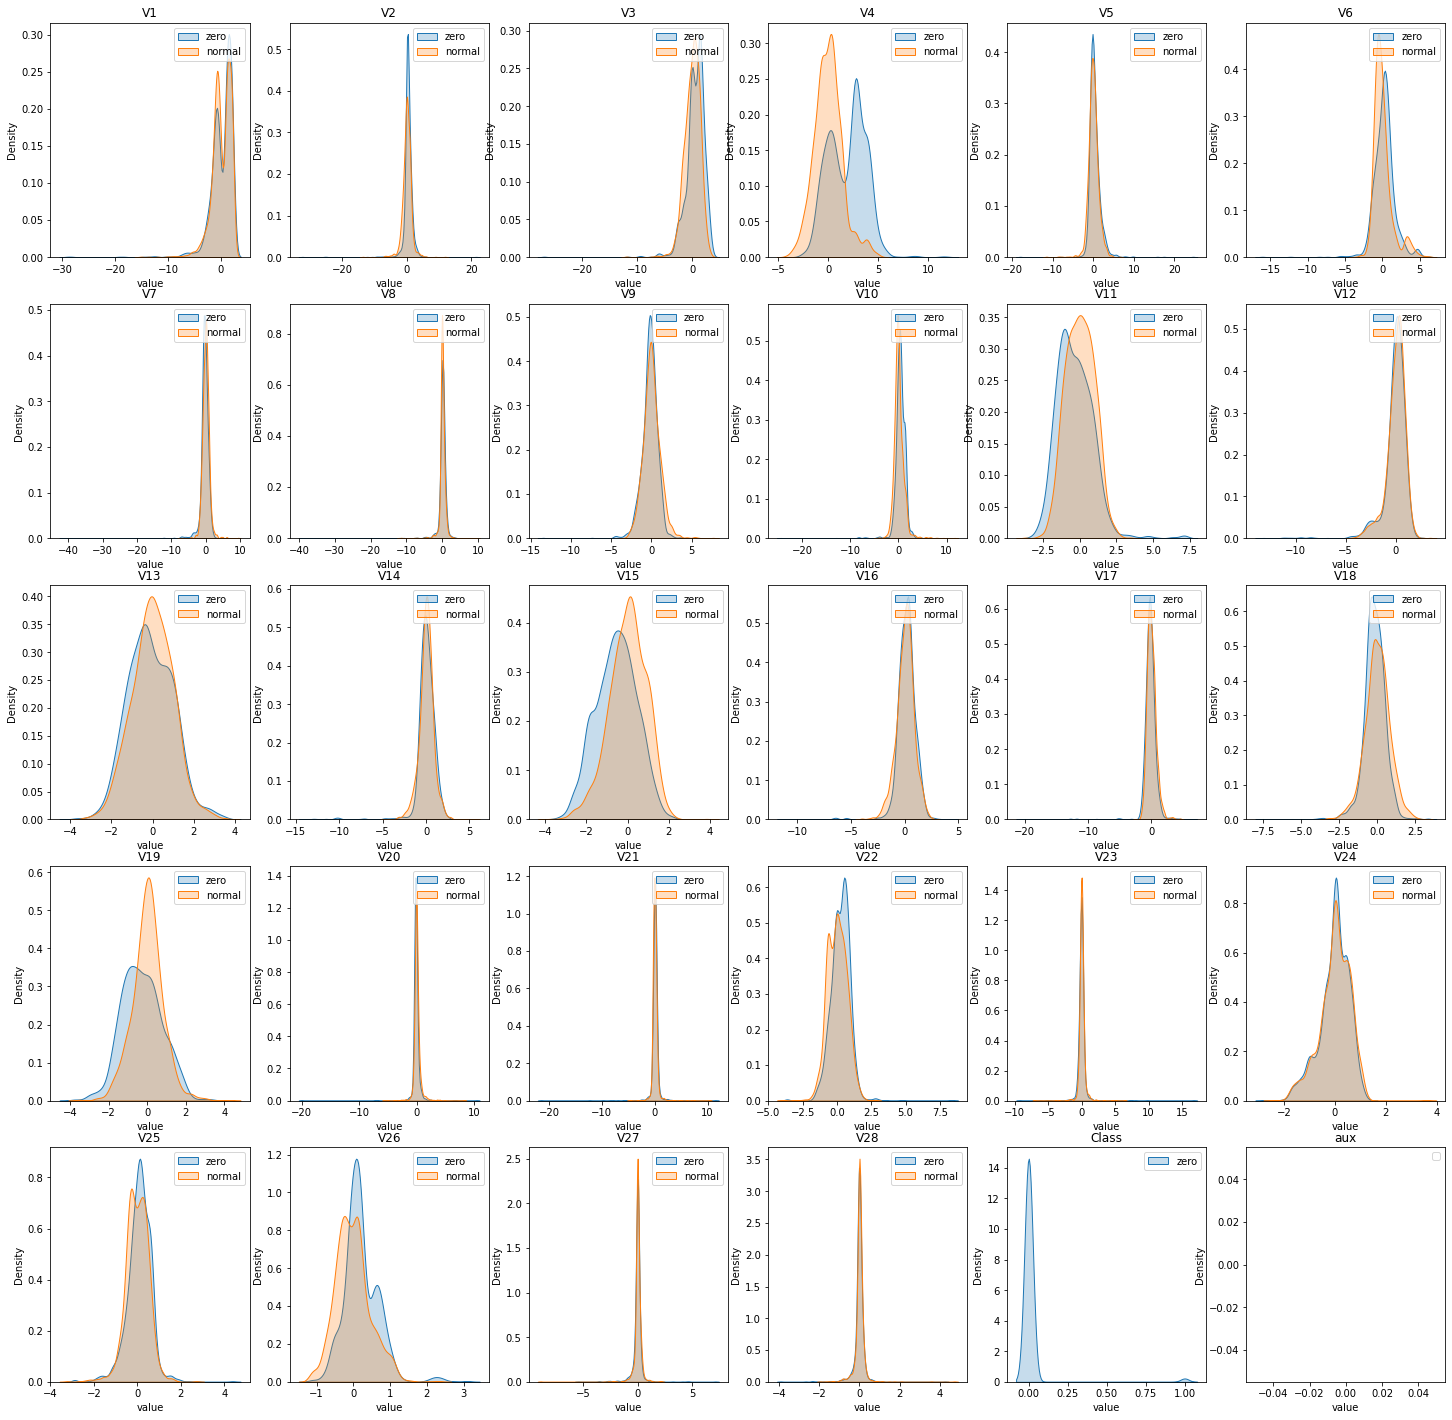

In [ ]:
comp_df = df.copy()
comp_df = df.drop(['Time','Amount'], axis=1)

normal_sample = comp_df[comp_df.aux == 0].sample(1850)
zero = comp_df[comp_df.aux == 1]

comp_df = pd.concat([normal_sample, zero], axis = 0)

plt.figure(figsize=(25, 25))
for i, col in enumerate(comp_df.columns):
    plt.subplot(5, 6, i+1)
    sns.kdeplot(comp_df.loc[comp_df['aux'] == 1, col], shade=True, label='zero')
    sns.kdeplot(comp_df.loc[comp_df['aux'] == 0, col], shade=True, label='normal')
    plt.xlabel('value')
    plt.title(col)
    plt.legend(loc='upper right')

plt.plot() 

As diferenças mais significativas (visualmente por meio da Figura 1) foram em relação aos atributos V4, V15, V19 e V26. Mesmo assim, como fica evidente pelas métricas que são diferenças bem pequenas. Considerando o comportamento do grupo que é muito similar ao grupo de transações com valores "normais" e quantidade pequena de transações com o montante zero associado, vamos considerar que essas são transaçoes normais também. Ainda assim, são casos interessantes para entender o contexto de negócio para saber se é algo esperado ou um possível erro do sistema de transações.

É essencial checar também a existência de registros duplicados no conjunto de dados.

In [ ]:
print(f'Duplicate rows: {len(df)-len(df.drop_duplicates())}')

Duplicate rows: 1081


In [ ]:
df[df.duplicated(keep='first')]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,aux
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,-0.484688,0.872490,0.851636,-0.571745,0.100974,-1.519772,-0.284376,-0.310524,-0.404248,-0.823374,-0.290348,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,-0.482474,0.871800,0.853447,-0.571822,0.102252,-1.519991,-0.285912,-0.309633,-0.403902,-0.823743,-0.283264,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,0.005356,-0.541998,0.745036,-0.375165,-0.068227,-0.795939,-0.497901,-0.134224,-1.004958,0.086074,-0.207620,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,-0.828015,-1.192581,0.944989,1.372532,-0.036493,-0.208747,0.320086,-0.204910,-0.024821,-0.468859,0.031950,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,-0.830603,-1.191774,0.942870,1.372621,-0.037988,-0.208490,0.321883,-0.205951,-0.025225,-0.468427,0.023667,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,-1.449823,-0.508930,0.600035,-0.627313,1.017499,-0.887384,0.420096,1.856497,1.315099,1.096112,-0.821707,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0,0


Foram encontradas 1081 linhas duplicadas no conjunto de dados. Esses registros foram removidos.

In [ ]:
clean_df = df.drop_duplicates()

Após toda limpeza, organização e análise que foi realizada vamos visualizar como está a composição do conjunto de dados.

In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

A variável tempo contabiliza o momento de cada transação. Como esse atributo não nos ajudará no modelo de machine learning, podemos removê-lo do conjunto de dados. Da mesma forma podemores remover a coluna aux criada anteriormente. Assim, manteremos apenas o que é essencial para a construção do nosso modelo, as features o atributo target.

In [ ]:
clean_df = clean_df.drop(['Time','aux'], axis=1)

Terminamos com um conjunto de dados organizado e limpo, contendo ao todo 283.726 registros.

Vou criar um conjunto de dados especial onde cada transação receberá uma chave, algo que funcionará como uma identificação. Isto ajudará ao agregar as coisas no EDA, se for necessário.

In [ ]:
clean_df_eda = clean_df.copy()

import uuid
clean_df_eda['transactionID'] = clean_df_eda.apply(lambda _: uuid.uuid4(), axis=1)

In [ ]:
len(clean_df_eda.transactionID.unique())

283726

That was exactly the number of rows, so uuid worked perfect for our need.

## 3. Análise Exploratória dos Dados (EDA)

É importante realizar uma análise exploratória dos dados para comparar o comportamento das transações fraudulentas e as transações normais.

In [ ]:
# summarize the class distribution
target = clean_df.values[:,-1]
counter = Counter(target)
for k,v in counter.items():
	per = v / len(target) * 100
	print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=0, Count=283253, Percentage=99.833%
Class=1, Count=473, Percentage=0.167%


### 3.1. Análise de diferença entre atributos por grupo

Inicialmente podemos fazer uma comparação visual entre a distribuição de cada atributo para uma amostra de dados oriundos da classe 0 (Normal) e todos os registros da classe 1 (Fraudulenta).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.


[]

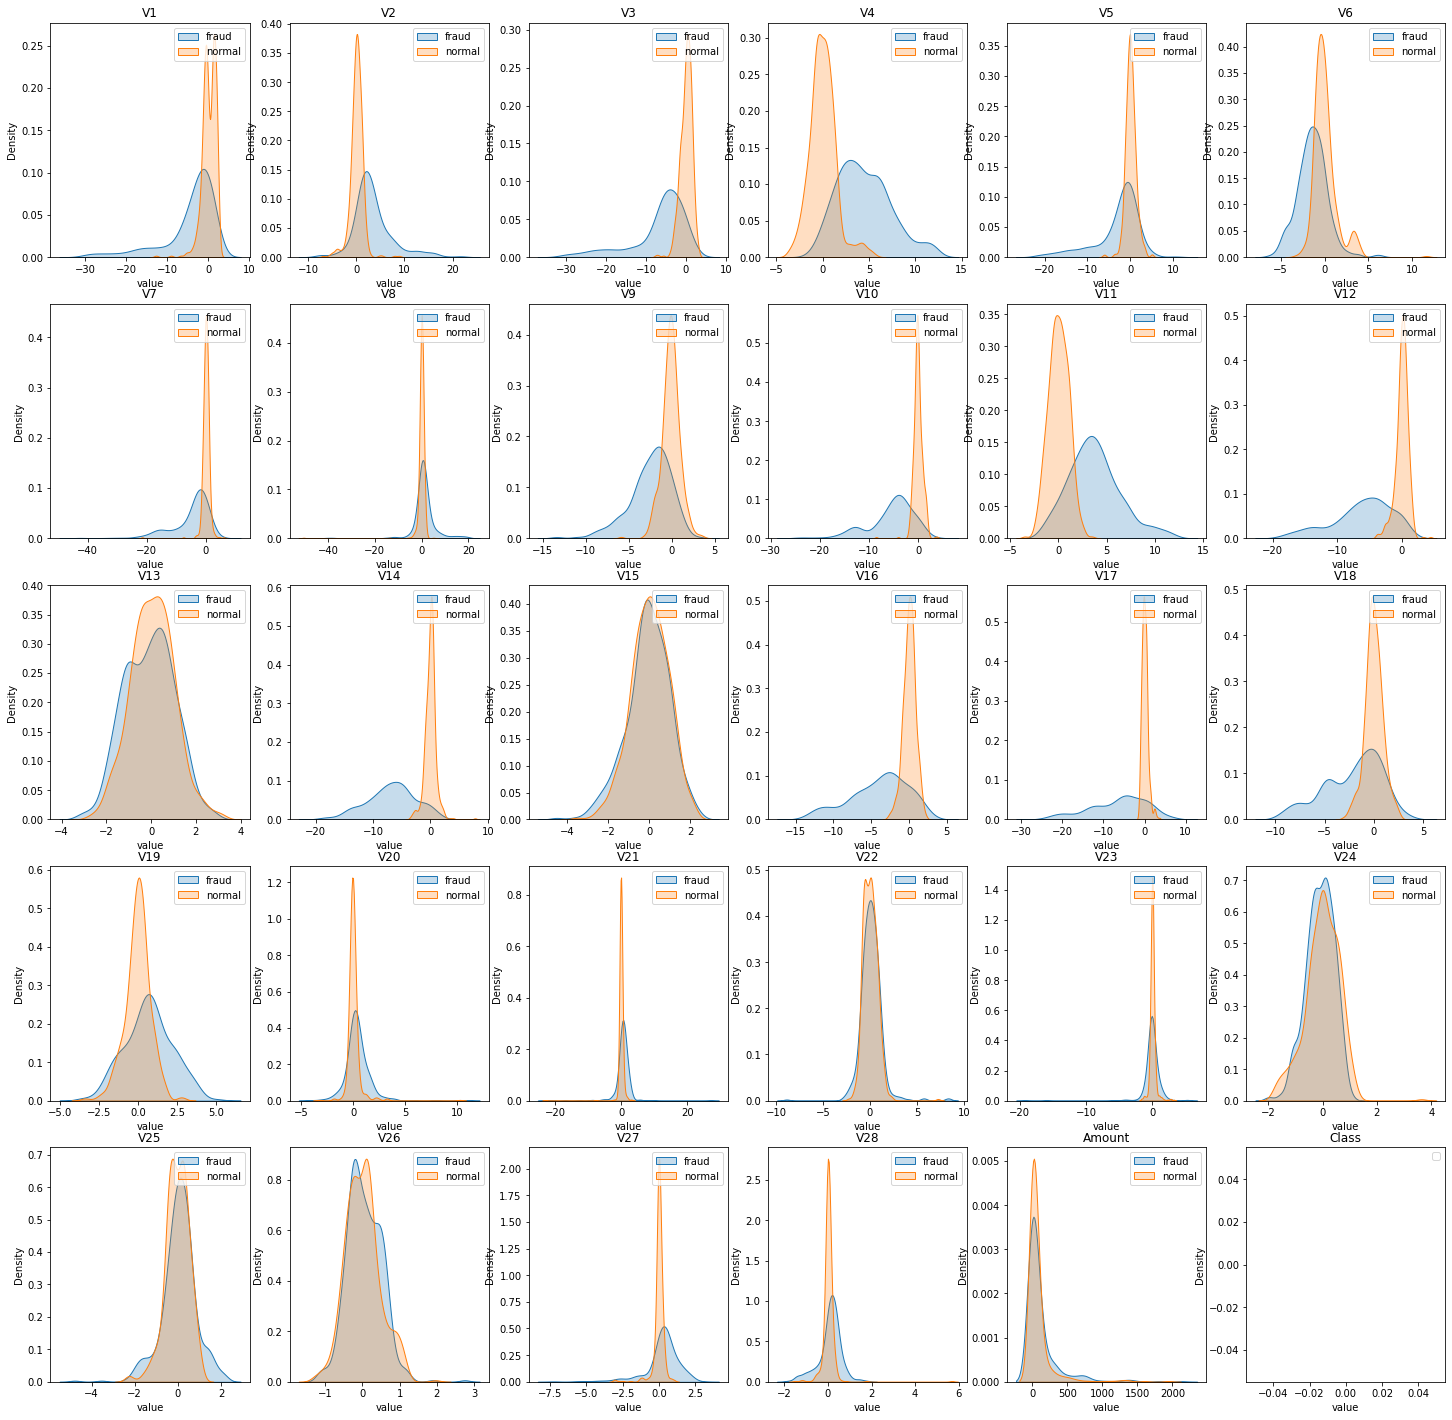

In [ ]:
comp_df = clean_df_eda.copy()
comp_df = comp_df.drop(['transactionID'], axis=1)

normal_sample = comp_df[comp_df.Class == 0].sample(492)
fraud = comp_df[comp_df.Class == 1]

comp_df = pd.concat([normal_sample, fraud], axis = 0)

plt.figure(figsize=(25, 25))
for i, col in enumerate(comp_df.columns):
    plt.subplot(5, 6, i+1)
    sns.kdeplot(comp_df.loc[comp_df['Class'] == 1, col], shade=True, label='fraud')
    sns.kdeplot(comp_df.loc[comp_df['Class'] == 0, col], shade=True, label='normal')
    plt.xlabel('value')
    plt.title(col)
    plt.legend(loc='upper right')

plt.plot() 

#### 3.1.1. Abordagem Estatística de Comparação

Descrevamos agora um método estatístico simples, que será utilizado na análise exploratória de comparação entre as classes.

Um determinado atributo $f$ de uma transação $x$

> $f(x)$

pode ser importante para o aprendizado no nosso modelo somente se ajudar a distinguir bem as duas classes de transações (fraudulentas e normais). Então, usamos algum tipo de função de agregação, por exemplo, a média para este atributo considerando os dois grupos (ou classes) existentes,

> $g(f, y)$  

onde *y* é a classe de transação (1 or 0). Isso visando determinar se existe uma diferença significativa entre os valores dos atributos $f$ entre os dois grupos. $f$. Como foi dito a agregação será realizada para os registros das duas classes de forma separada. Se o valor absoluto da diferença entre os valores obtidos com a agregação,

> diff = $|g(f, 1) - g(f, 0)|$ 

forem maiores que valor limite estipulado por nós, podemos dizer então que o atributo $f$ distingue bem as duas classes avaliadas. Agora para determinar o valor se a diferença, *diff*, é grande o bastante, precisamos primeiro colocar esse valor em uma proporção, de modo que a magnitude do valor interfira nos resultados. Os valores *g* são então:

> $g_1$ = $g(f, 1)$ 

and 

> $g_2$ = $g(f, 0)$

Assim, a proporção da agregação para transações fraudulentas dado um atributo $f$ é:

> $r_1$ = $\frac{g_1}{g_1 + g_0}$  

De forma semelhante, a proporção da agregação para transações normais é:

> $r_0$ = $\frac{g_0}{g_1 + g_0}$  

A diferença entre as duas proporções de agregação ($\Delta$) é dado por:

> $\Delta$ = $r_1$ - $r_0$ = $\frac{g_1 - g_0}{g_1 + g_0}$ 

Delta é uma diferença de proporçoes é uma diferença entre proporçoes e os valores variam entre 0 to 1.

A ideia por trás do uso do delta como um critério de seleção das features é que uma feature é importante para o modelo se ela é capaz de distinguir bem as duas classes de transações. Se o valor limite de delta for definido como|Δ|>0.15, isso significaria que para um atributo ser escolhido como uma feature deve existir ao menos 15% de diferença entre, por exemplo, a média entre as classes de transações.

In [ ]:
# Define and analyze the f function
f_Transactions = clean_df_eda

# Obtain the g function
g = f_Transactions.groupby(by='Class').mean()
g.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,0.007663,-0.006004,0.009476,0.000762,0.011668,0.001166,0.007845,0.010963,0.005120,-0.001382,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,-5.453274,3.716347,-6.103254,-0.094324,-6.835946,-0.072830,-4.000956,-6.463285,-2.157071,0.669143,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


In [ ]:
ratio_list = []
delta_list = []

# Calculate the ratio of fraud transactions for the mean of attribute (Row 0. iloc(0))
for column in g.columns:
    ratio_vec = list(g[column].values)
    ratio_1 = abs(ratio_vec[1])/(abs(ratio_vec[0])+abs(ratio_vec[1]))
    ratio_0 = abs(ratio_vec[0])/(abs(ratio_vec[0])+abs(ratio_vec[1]))
    delta = ratio_1 - ratio_0
    ratio_list.append([ratio_1, ratio_0])
    delta_list.append(delta)

print(ratio_list)
print(delta_list)

[[0.9970213918443458, 0.0029786081556542154], [0.9971224170568654, 0.0028775829431346273], [0.9980936504789142, 0.0019063495210857669], [0.9976712240454727, 0.00232877595452726], [0.9977163057419444, 0.00228369425805567], [0.9991276490498856, 0.0008723509501144957], [0.9979857009698719, 0.002014299030128062], [0.997438841384518, 0.0025611586154819337], [0.9989651227735474, 0.001034877226452542], [0.9985967197398159, 0.0014032802601841056], [0.9983871003203771, 0.001612899679622906], [0.998449832922137, 0.0015501670778630156], [0.9919873179527546, 0.008012682047245348], [0.9982960511645768, 0.0017039488354232241], [0.9842396870306787, 0.015760312969321358], [0.9980430332402945, 0.001956966759705532], [0.9983066159093726, 0.0016933840906273897], [0.9976321435919364, 0.002367856408063544], [0.9979387842503454, 0.0020612157496545614], [0.9987944537776207, 0.0012055462223793708], [0.9975405261109783, 0.0024594738890216855], [0.9981597670141835, 0.0018402329858164999], [0.9962861824661235, 0

In [ ]:
dic = dict(zip(g.columns, ratio_list))
ratio_df = pd.DataFrame(dic).T
ratio_df.rename(columns={0:'fraud',1:'normal'}, inplace=True)
print(ratio_df)

           fraud    normal
V1      0.997021  0.002979
V2      0.997122  0.002878
V3      0.998094  0.001906
V4      0.997671  0.002329
V5      0.997716  0.002284
V6      0.999128  0.000872
V7      0.997986  0.002014
V8      0.997439  0.002561
V9      0.998965  0.001035
V10     0.998597  0.001403
V11     0.998387  0.001613
V12     0.998450  0.001550
V13     0.991987  0.008013
V14     0.998296  0.001704
V15     0.984240  0.015760
V16     0.998043  0.001957
V17     0.998307  0.001693
V18     0.997632  0.002368
V19     0.997939  0.002061
V20     0.998794  0.001206
V21     0.997541  0.002459
V22     0.998160  0.001840
V23     0.996286  0.003714
V24     0.996332  0.003668
V25     0.992653  0.007347
V26     0.998705  0.001295
V27     0.993452  0.006548
V28     0.994694  0.005306
Amount  0.583516  0.416484


In [ ]:
dic = dict(zip(g.columns, delta_list))
delta_df = pd.DataFrame(dic, index = ['delta']).T
print(delta_df*100)

            delta
V1      99.404278
V2      99.424483
V3      99.618730
V4      99.534245
V5      99.543261
V6      99.825530
V7      99.597140
V8      99.487768
V9      99.793025
V10     99.719344
V11     99.677420
V12     99.689967
V13     98.397464
V14     99.659210
V15     96.847937
V16     99.608607
V17     99.661323
V18     99.526429
V19     99.587757
V20     99.758891
V21     99.508105
V22     99.631953
V23     99.257236
V24     99.266326
V25     98.530649
V26     99.740964
V27     98.690417
V28     98.938784
Amount  16.703118


Portanto, mesmo o atributo com menor delta (montante) apresenta uma diferença de 16.7% na média entre grupos. Esses resultados são muito promissores para construção de um modelo de machine learning.

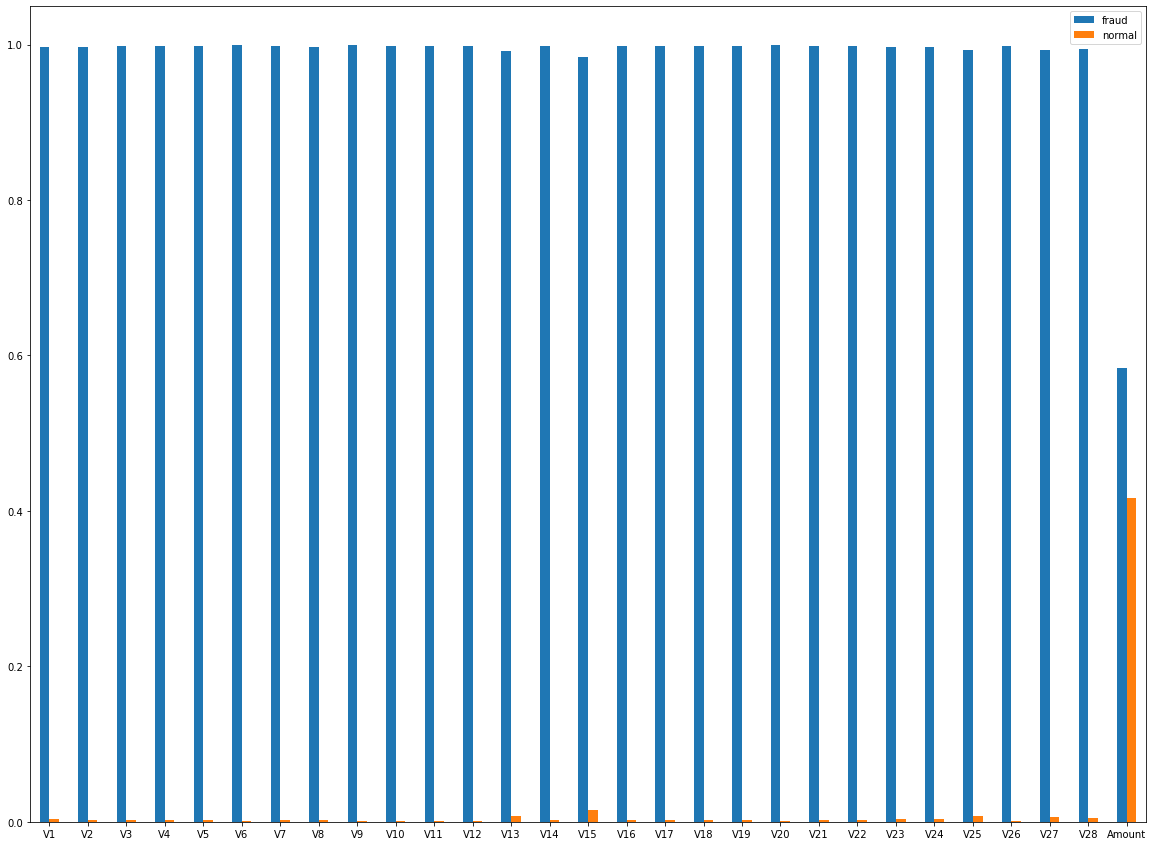

In [ ]:
# Barplot each feature as a group divide into classes
ax = ratio_df.plot.bar(rot=0, figsize=(20,15))

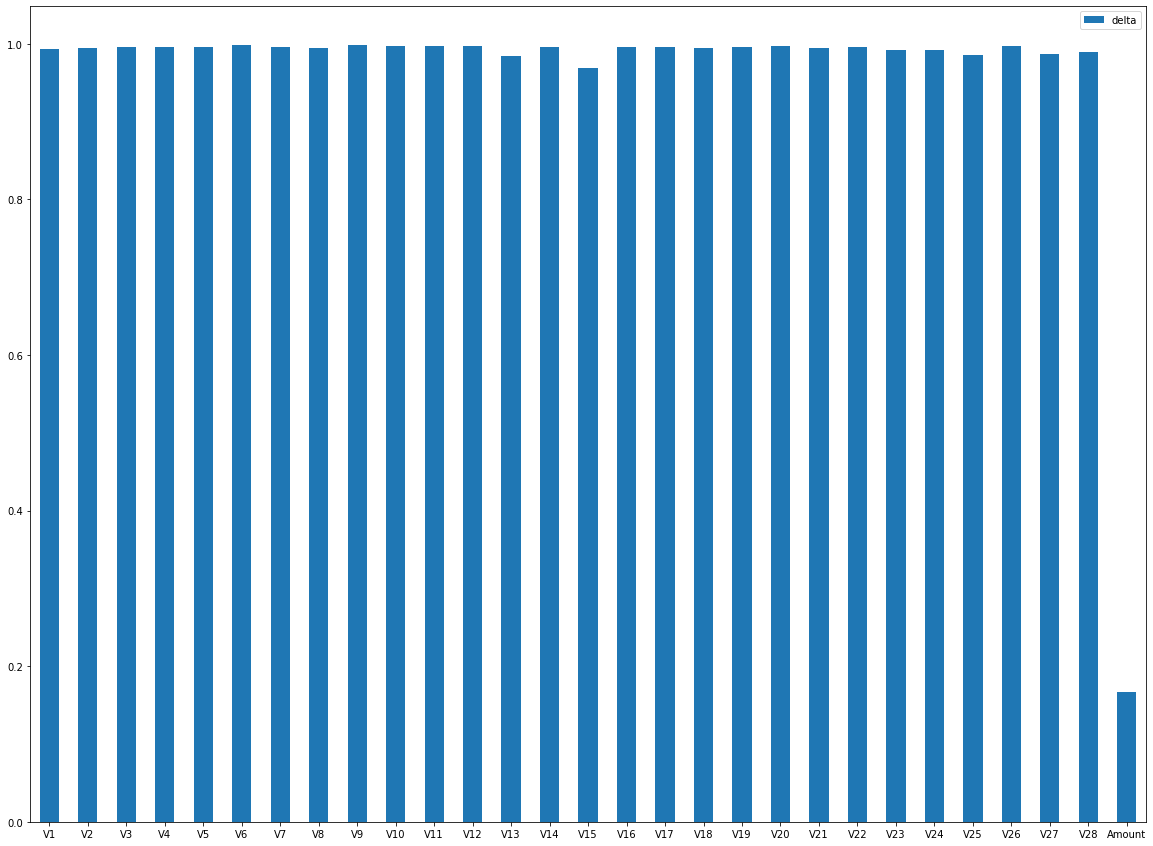

In [ ]:
# Barplot each feature as a group divide into classes
ax = delta_df.plot.bar(rot=0, figsize=(20,15))

O que havíamos percebido por meio da comparação visual na Figura 2, foi confirmado por nossa análise estatística quantitativa. Mesmo o atributo com menor delta (montante) apresenta uma diferença de 16.7% na média entre grupos, que foi acima do valor threshold definido para delta.

Esses resultados são muito promissores para construção de um modelo de machine learning, ainda mais considerando o desbalanceamento do conjunto de dados.

Agora que analisamos as diferenças entre as médias dos atributos do conjunto de dados considerando a classe associada aos registros podemos avançar para a engenharia de features.

## 4. Engenharia de Features

O primeiro aspecto importante aqui é que não temos variáveis categóricas no conjunto de dados. Assim, não será necessário realizar transformação por meio de encoders.

Outra questão importante é que a engenharia de features na verdade começou quando retiramos as colunas que não seriam importantes na seção de organização dos dados.

Quando fizemos a análise dos atributos na seção anterior foi exatamente para investigar a relevância desses atributos de modo a apoiar a seleção das features que serão escolhidas para o modelo. Portanto, atividades relacionadas a engenharia de features não estão restritas a essa seção apenas.

Para o conjunto de dados todos os atributos foram consideradas relevantes. É importante seguirmos uma metodologia independente do conjunto de dados, em outros projetos a análise estatística e visual das features provou ser muito valiosa para a etapa de seleção de features e feature engineering.

### 4.1. Seleção Inicial de Features

Devido aos resultados obtidos na seção anterior, todos os atributos presentes no conjunto de dados organizado e limpo foram escolhidos como features para os modelos que serão testados.

In [ ]:
X = clean_df.drop('Class', axis=1).values
y = clean_df['Class'].values

Como dito anteriormente, foi feita uma transformação PCA no conjunto de dados para gerar V1 até V28. Dessa forma, esperamos que essas features não apresentem correlação. Porém, é possível que a feature Amount apresente alta correlação com alguma das outras features. Investigamos isso por meio de um mapa de calor dos coeficientes de correlação de Pearson entre todas as features.

### 4.2. Análise de Correlação entre Features

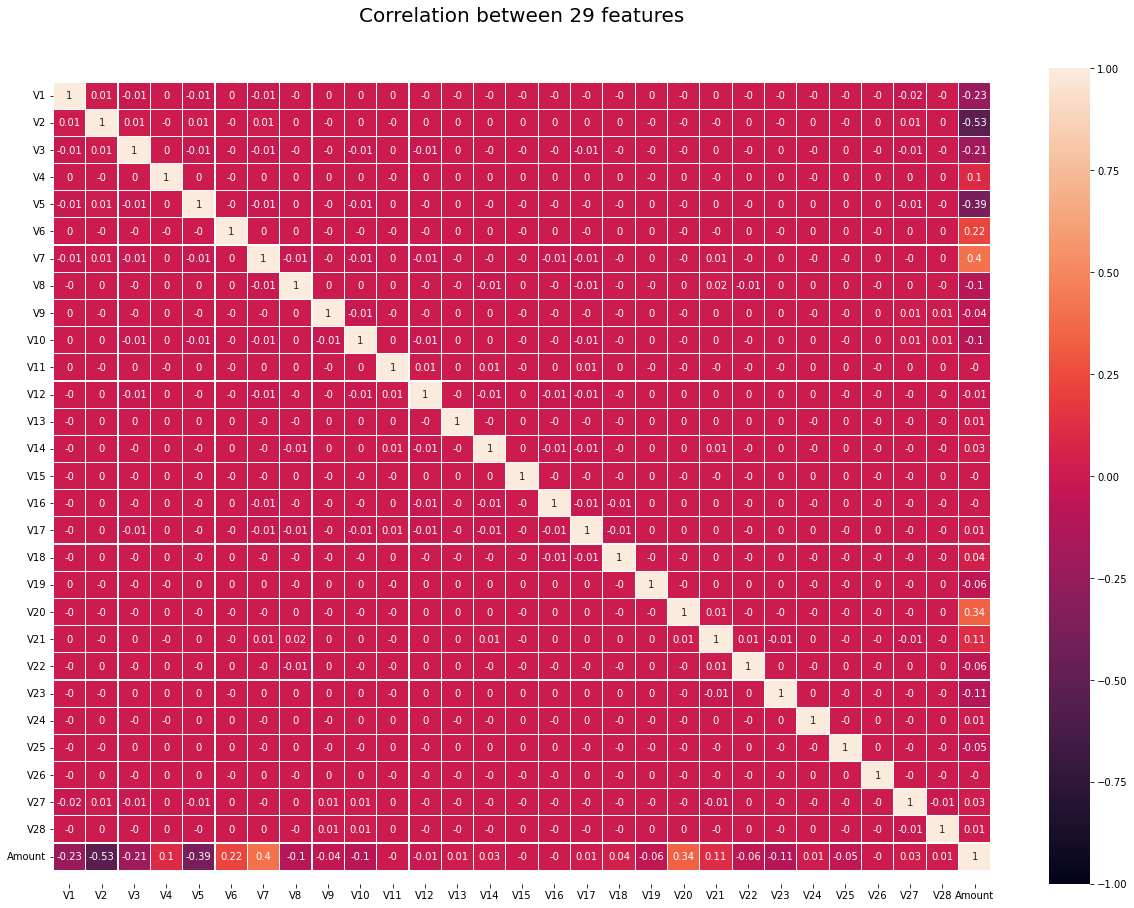

In [ ]:
corr_df = clean_df.drop('Class', axis=1)

# Plot correlation heatmap
plt.figure(figsize = [21, 15])
plt.title('Correlation between 29 features', y=1.05, size=20)
ax = sns.heatmap(corr_df.iloc[:, 0:].corr().round(2), annot=True, 
                square=False,
                cbar=True, linewidth=0.2,
                vmin = -1, vmax = 1)
plt.yticks(rotation = 0)

# Correct plot cut off (Note: we must fix it due to the bug in the matplotlib 3.1.1)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Como esperado a correlação entre as features oriundas do PCA é quase nula. Além disso, confirmamos que a correlação entre a feature Amount e as outras é pequena.

Dado que nenhum valor expressivo de correlação entre as features foi encontrado, podemos continuar para a etapa de modelagem.

## 5. Modelagem

A etapa de modelagem pode ser divida em algumas fases menores. Para nosso projeto vamos passar pelas seguintes fases:

* Teste de diversos modelos de classificação.
* Seleção do modelo considerando o contexto de negócio e a performance obtida.
* Otimização de hiperparâmetros.
* Finalização do modelo.

Em relação a primeira fase, algumas atividades foram realizadas com o objetivo de apoiar a seleção do melhor modelo no nosso contexto. Algumas informações importantes sobre a fase são:

* Foi realizada a definição de modelos baseline (referências) como soluções iniciais do problema. Optamos pelo uso do RepeatedStratifiedKFold com número de folds igual a 5, número de repetições igual a 3 e random-state de 42 (para garantir a reprodutibilidade dos experimentos).

* Teste de diversos modelos de classificação (aprendizado supervisionado) da área de Machine Learning. Também optamos pelo uso do RepeatedStratifiedKFold com número de folds igual a 5, número de repetições igual a 3 e random-state de 42 (para garantir a reprodutibilidade dos experimentos).

* A métrica definida inicialmente, F1 Score, foi utilizada para mensurar a performance dos modelos.

* Todos os modelos foram incluídos em pipelines de Machine Learning. E todos pipelines contaram com uma step inicial de transformação dos dados por meio do StandardScaler e uma step com o próprio modelo de ML sendo definido.

* Todos os modelos fizeram uso do hiperparâmetros default. Excentuando-se o parâmetro class_weight que na maioria dos casos foi definido como 'balanced'. Essa mudança foi realizada devido ao grande desbalanceamento existente no conjunto de dados. Ela penaliza mais os erros cometidos em relação a classificação da classe minoritária durante o treinamento do modelo. Essa penalização é feita de forma proporcional a distribuição entre as classes. O próprio módulo Sklearn indica a favor da alteração do parâmetro em casos de desbalanceamento entre classes.

* O uso do RepeatedStratifiedKFold permitiu o cálculo da média e do desvio padrão nos valores do F1 Score para cada modelo treinado.
Não realizamos o balanceamento dos dados considerando que o uso de pesos nos classificadores seria suficiente para atingirmos nosso objetivo aqui. Temos como base que os atributos parecem ter uma diferença expressiva de comportamento (distribuição) considerando o grupo de transações normais e fraudulentas (Figura 2, 3 e 4).

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import auc
from sklearn.metrics import recall_score, f1_score
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

Vamos ao teste dos modelos de machine learning.

In [ ]:
# evaluate a model
def evaluate_model(X, y, model):
	# define evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
	# define the model evaluation the metric
	metric = make_scorer(f1_score)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring=metric, cv=cv)
 
	return scores

### Modelos Baseline

Modelo Baseline 1

> - *29 features*
> - *RepeatedStratifiedKFold (5 folds & 3 repetições)*
> - *DummyClassifier com estratégia constante de prever todos os casos como fraudes.*
> - *Validação cruzada baseada no RepeatedStratifiedKFold*

In [ ]:
# define the reference model
model = DummyClassifier(strategy='constant', constant=1)

# evaluate the model
scores = evaluate_model(X, y, model)

# summarize performance
print('Mean F1_Score: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean F1_Score: 0.003 (0.000)


Modelo Baseline 2

> - *29 features*
> - *RepeatedStratifiedKFold (5 folds & 3 repetições)*
> - *DecisionTreeClassifier com random state = 42*
> - *Validação cruzada baseada no RepeatedStratifiedKFold*

In [ ]:
# define the reference model
model = DecisionTreeClassifier(random_state=42)

# evaluate the model
scores = evaluate_model(X, y, model)

# summarize performance
print('Mean F1_Score: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean F1_Score: 0.752 (0.021)


### 5.1. Modelo A - Decision Tree

> - *29 features*
> - *RepeatedStratifiedKFold (5 folds & 3 repetições)*
> - *DecisionTreeClassifier com random state = 42 e class weight = 'balanced'*
> - *Validação cruzada baseada no RepeatedStratifiedKFold*
> - *Pipeline com StandardScaler e Classificador*

In [ ]:
# define the reference model
pipeline = Pipeline(steps=[('standardscaler', StandardScaler()),
                           ('model', DecisionTreeClassifier(random_state=42, 
                                                            class_weight='balanced'))])

# evaluate the model
scores = evaluate_model(X, y, pipeline)

# summarize performance
print('Mean F1_Score: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean F1_Score: 0.733 (0.038)


### 5.2. Modelo B - Logistic Regression

> - *29 features*
> - *RepeatedStratifiedKFold (5 folds & 3 repetições)*
> - *LogisticRegression com random state = 42 e class weight = 'balanced'*
> - *Validação cruzada baseada no RepeatedStratifiedKFold*
> - *Pipeline com StandardScaler e Classificador*

In [ ]:
# define the reference model
pipeline = Pipeline(steps=[('standardscaler', StandardScaler()), 
                           ('model', LogisticRegression(random_state=42, 
                                                        class_weight='balanced'))])

# evaluate the model
scores = evaluate_model(X, y, pipeline)

# summarize performance
print('Mean F1_Score: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean F1_Score: 0.112 (0.006)


### 5.3. Modelo C - Random Forests

> - *29 features*
> - *RepeatedStratifiedKFold (5 folds & 3 repetições)*
> - *RandomForestClassifier com random state = 42 e class weight = 'balanced'*
> - *Validação cruzada baseada no RepeatedStratifiedKFold*
> - *Pipeline com StandardScaler e Classificador*

In [ ]:
# define the reference model
pipeline = Pipeline(steps=[('standardscaler', StandardScaler()), 
                           ('model', RandomForestClassifier(random_state=42, 
                                                            class_weight='balanced'))])

# evaluate the model
scores = evaluate_model(X, y, pipeline)

# summarize performance
print('Mean F1_Score: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean F1_Score: 0.837 (0.025)


### 5.4. Modelo D - Naive Bayes

> - *29 features*
> - *RepeatedStratifiedKFold (5 folds & 3 repetições)*
> - *GaussianNB*
> - *Validação cruzada baseada no RepeatedStratifiedKFold*
> - *Pipeline com StandardScaler e Classificador*

In [ ]:
# define the reference model
pipeline = Pipeline(steps=[('standardscaler', StandardScaler()), 
                           ('model', GaussianNB())])

# evaluate the model
scores = evaluate_model(X, y, pipeline)

# summarize performance
print('Mean F1_Score: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean F1_Score: 0.109 (0.003)


### 5.5. Modelo E - Classificador Ridge (Linear)

> - *29 features*
> - *RepeatedStratifiedKFold (5 folds & 3 repetições)*
> - *RidgeClassifier com random state = 42 e class weight = 'balanced'*
> - *default hyperparameters*
> - *Validação cruzada baseada no RepeatedStratifiedKFold*
> - *Pipeline com StandardScaler e Classificador*

In [ ]:
# define the reference model
pipeline = Pipeline(steps=[('standardscaler', StandardScaler()), 
                           ('model', RidgeClassifier(class_weight='balanced'))])

# evaluate the model
scores = evaluate_model(X, y, pipeline)

# summarize performance
print('Mean F1_Score: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean F1_Score: 0.162 (0.016)


### 5.6. Modelo F - Gradient Boosted Decision Trees

> - *29 features*
> - *RepeatedStratifiedKFold (5 folds & 3 repetições)*
> - *XGBClassifier com random state = 42*
> - *Validação cruzada baseada no RepeatedStratifiedKFold*
> - *Pipeline com StandardScaler e Classificador*

In [ ]:
# define the reference model
pipeline = Pipeline(steps=[('standardscaler', StandardScaler()), 
                           ('model', XGBClassifier(random_state=42))])

# evaluate the model
scores = evaluate_model(X, y, pipeline)

# summarize performance
print('Mean F1_Score: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean F1_Score: 0.835 (0.025)


### 5.7. Selecionar Modelo

Agora temos condições de escolher um modelo para levar para a fase de otimização dos hiperparâmetros. Quando escolhemos um modelo de ML para otimizar devemos pensar em algumas coisas, por exemplo:

* Os stakeholders do projeto (S.A. Banco) tem algum requisito em relação ao modelo? Um exemplo poderia ser relacionado a mantenabilidade do modelo ou que ele não seja tão complexo. As vezes um modelo mais simples, porém mais fácil de ser entendido pode ser uma melhor escolha.

* A maior preocupação sobre o modelo é sua performance? Então o modelo deverá ser escolhido segundo a métrica de avaliação definido no início do projeto.

* Um modelo que seja bom o suficiente pode ser um modelo que: Que cumpre os requisitos definidos pelos stakeholders do projeto, um modelo que tenha uma performance superior a outros modelos testados, ou até mesmo um modelo que seja considerado superior para abordar o problema considerando o estado da arte atual.

É importante ressaltar que não estamos escolhendo um modelo já treinado, todos serão excluídos. O modelo escolhido passará pela fase de otimização da sua performance por meio da otimização dos hiperparâmetros do modelo.

Somente após essa fase temos a fase de finalização, que é quando o modelo escolhido será treinado de fato usando todos os dados disponíveis.

> O S.A. Banco necessita de um modelo com a melhor performance possível para colocar este modelo em produção. Sendo assim, escolheriamos o classificador XGBoost devido a diferença mínima no F1 Score em relação ao Random Forest e o menor tempo de treinamento que ele necessita. Isso é um fator importante pensando na mantenabilidade do modelo em produção.



### 5.8. Otimizar hiperparâmetros do modelo

A otimização dos hiperparâmetros por meio do GridSearchCV com a validação cruzada baseada no RepeatedStratifiedKFold levou a resultados melhores. O grid para o search foi um grid de parâmetros reduzido. Em um caso prático é aconselhável a aumentar significativamente as opções neste grid. O grid considerado foi:

param_grid = {'model__max_depth': [5, 6], 'model__n_estimators': [75, 100, 125]

In [ ]:
def fit_model_gridsearch(X, y, model, params):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
    # define the model evaluation the metric
    metric = make_scorer(f1_score)
    # evaluate model
    search = GridSearchCV(model, param_grid=params, scoring=metric, cv=cv)
    print('Grid search started. Please wait...')
    search.fit(X,y)
    print('Grid search done')
 
    return search

In [ ]:
# Create classifier
pipeline = Pipeline(steps=[('standardscaler', StandardScaler()), 
                           ('model', XGBClassifier(random_state=42))])

# Define params grid
param_grid = {'model__max_depth': [5, 6],
              'model__n_estimators': [75, 100, 125]
}

# gridsearch
gridsearch = fit_model_gridsearch(X, y, pipeline, param_grid)

Grid search started. Please wait...
Grid search done


In [ ]:
# summarize result
print('Best Score: %s' % gridsearch.best_score_)
print('Best Hyperparameters: %s' % gridsearch.best_params_)

Best Score: 0.8597255238777699
Best Hyperparameters: {'model__max_depth': 5, 'model__n_estimators': 125}


O melhor resultado resultado para o F1 Score foi de 0.8597 ~ 0.86. Uma melhoria de quase 3% em relação ao obtido na fase anterior, o que é excelente considerando o grid reduzido que foi usado. Os melhores parâmetros foram max_depth = 5 e n_estimators = 125.

Outras abordagens interessantes para a otimização seriam o uso do RandomSearchCV ou da Otimização Bayesiana.

Agora conhecendo os valores dos hiperparâmetros que levaram a melhores resultados, podemos iniciar a fase de finalização do modelo.

### 5.11. Finalizando um modelo


O modelo finalizado é importante pois nos permite salvar o modelo para usar depois ou de forma operacional. Lógico, a finalização do modelo nos permite realizar previsões em novos dados.

O modelo escolhido será treinado usando todos os dados disponíveis.
Algumas questões comuns relacionadas a fase de finalização são:

> O que será feito com os modelos do CV e os conjuntos de treino e teste usados (ou K folds) anteriormente?

Esses modelos e conjuntos de dados serão descartados (inclusive já foram bem antes da fase de finalização). Eles não são mais necessários. O propósito deles foi auxiliar na escolha de um modelo para abordar nosso problema de classificação.

> Se você treina um modelo em todo conjunto de dados, como você saberá que ele vai performar bem?

A resposta para isso está exatamente na abordagem usando validação cruzada e amostragem estratificada. Se bem projetado, as métricas de desempenho que você calcula usando a validação cruzada k-fold estratíficada e com repetição descrevem adequadamente o desempenho do modelo finalizado treinado em todos os dados históricos disponíveis em geral. Em outras palavras, você terá uma estimativa de quão "errado" (ou quão "certo") o modelo será em média, e a propagação esperada desse erro ou acerto.

É por isso que um projeto cuidadoso de todo processo de modelagem é tão crítico no aprendizado de máquina. Conduzir esse processo usando mecanismos de testes mais robustos (apesar de computacionalmente mais custosos) permitirá que você se apóie ainda mais no desempenho estimado.

O artigo escrito por Sujit Venkata é uma boa introdução ao uso da validação cruzada e os diferentes tipos existentes. De forma complementar, o artigo de Ayobami Akiode fala sobre como usar a técnica em um problema com dados desbalanceados. (link no post do Medium)

O artigo escrito por Sujit Venkata é uma boa introdução ao uso da validação cruzada e os diferentes tipos existentes. De forma complementar, o artigo de Ayobami Akiode fala sobre como usar a técnica em um problema com dados desbalanceados. (link no post do Medium)

Em nenhum ponto da etapa de modelagem foi identificado vazamento de dados (Data Leakage). Todas os processos foram cuidadosamente pensados para evitar este tipo de problema.

#### 5.11.1. Train Final Model

Em suma, durante a etapa de finalização treinamos novamente o modelo escolhido e com os melhores parâmetros obtidos considerando todo conjunto de dados.

In [ ]:
X = clean_df.drop('Class', axis=1).values
y = clean_df['Class'].values

# Use the best params
pipeline = Pipeline(steps=[('standardscaler', StandardScaler()), 
                           ('model', XGBClassifier(random_state=42,
                                                   max_depth=5, 
                                                   n_estimators=125))])

# Fit with all data
pipeline.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('model',
                 XGBClassifier(max_depth=5, n_estimators=125,
                               random_state=42))])

#### 5.11.2. Save the model

Após isso salvamos o modelo como um arquivo .pickle (no caso de modelos construídos com Sklearn).

In [ ]:
import pickle

print('Saving model...')

# Save model to pickle file
filename = 'best_model.pkl'
pickle.dump(pipeline, open(filename, 'wb'))

print('Trained model saved!')

Saving model...
Trained model saved!


#### 5.11.3. Plot feature importance

Além disso, muitas vezes pode ser interessante analisar a importância das features para o modelo. Uma opção é plotar a importância das features usando pipeline.steps[x][x].feature_importances_. Para nosso modelo obtemos o seguinte resultado

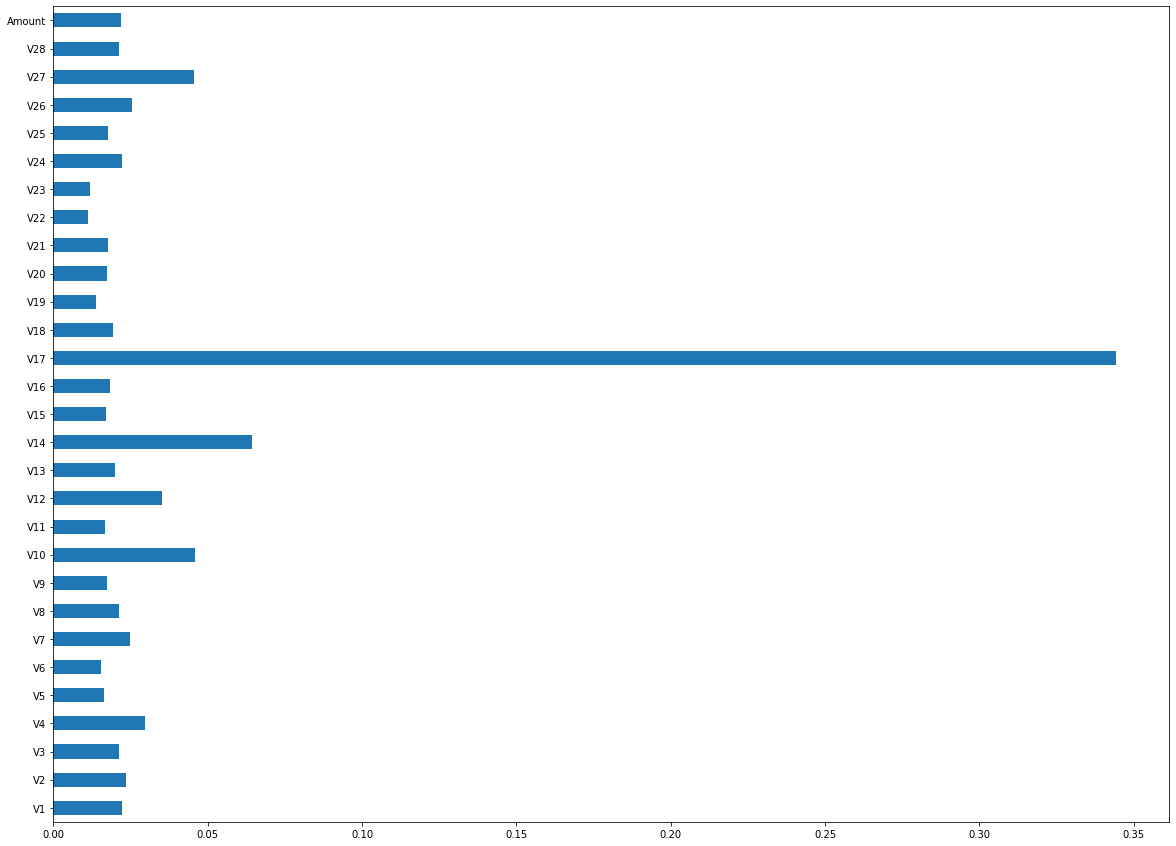

In [ ]:
# Plotar importância das features
feat_importances = pd.Series(pipeline.steps[1][1].feature_importances_, index=clean_df.drop('Class', axis=1).columns)
feat_importances.plot(kind='barh', figsize=(20,15))

A feature V17 foi a mais importante para o modelo. Se analisarmos o gráfico de comparação entre médias dos atributos considerando as duas classes (Figura 2) podemos perceber como a distribuição era bem diferente.

Muitas vezes esse gráfico pode gerar insights valiosos para um melhor entedimento do problema no contexto de negócio associado. Porém, no nosso caso a maioria das features são fruto de um PCA e isso reduz a quase zero a interpretabilidade das features.

Isso não é necessariamente um problema, mas pode dificultar o entedimento dos stakeholders em alguns momentos.

Uma outra opção interessante para analisar nosso modelo que é uma Black-Box é tentar usar Partial Plots. Um artigo bem interessante sobre o tema foi escrito por Raymond Willey. (link no post do Medium)

## 6. Conclusão

Como nosso F1 Score foi aproximadamente 0.86 e considerando toda a abordagem do problema (incluindo os objetivos colocados inicialmente), avaliamos que o modelo teve uma performance suficiente para apresentarmos ao S.A. Banco. O modelo escolhido então foi o XGBClassifier com os seguintes hiperparâmetros:

* max_depth=5
* n_estimators=125
* random_state=42

Os outros parâmetros que não foram apresentados tem valores default na configuração. As 5 features mais importantes do modelo em ordem de importância são:

* V17 (~35%)
* V14 (~7%)
* V10(~5%)
* V27 (~5%)
* V12 (~4%)

Infelizmente não podemos transformar isso a algo que seja interpretável no contexto de negócio.

### 6.1. Sugestões

Pensando que o modelo depois poderá ser desenvolvido em conjunto com a equipe de dados do S.A. Banco, temos algumas opções possíves e que podem ser investigadas separadamente e depois trabalhadas em conjunto.

* O primeiro ponto de melhoria é que poderia ser desenvolvido uma função customizada capaz de realizar a validação cruzada k-fold estratíficada e com repetição e implementar uma transformação voltada para balanceamente dos dados somente nos conjuntos de treino. A função se comportaria de forma similar a RepeatedStratifiedKFold, porém poderia faciliar melhorar a performance do modelo. Uma ideia de como deverá ser função pode ser vista no StackOverflow.
* O segundo ponto interessante seria trabalhar não apenas com um modelo na fase de otimização dos hiperparâmetros. Por exemplo, poderiamos escolher os três melhores modelos, ou dois melhores e um não tão complexo para fazer a otimização. É possível que um modelo que não fosse tão bem na primeira fase da modelagem pudesse se destacar na segunda fase devido a novos hiperparâmetros.
* Um terceiro ponto seria testar o aumento no número de folds do RepeatedStratifiedKFold. Isso tornaria o processo de treinamento do modelo mais custoso computacionalmente. Por outro lado, isso poderia tornar o processo ainda mais robusto.
* Um quarto ponto seria usar a otimização bayesiana para otimização dos hiperparâmetros do modelo. Com o Grid Search você define valores fixos para cada hiperparâmetro, ele testa todas as combinações diferentes e retorna a que apresentou o melhor resultado para a métrica de avaliação selecionada. A otimização bayesiana por sua vez "aprende" a cada iteração, ou seja, convergindo para valores (ou combinações) de hiperparâmetros que levam a melhores resultados. Assim pode ser muito interessante usar a técnica na otimização dos modelos. Dito isso, vale dizer que não temos garantia que a otimização bayesiana irá nos levar a conjuntos de parâmetros que melhorem a performance do modelo.

Apesar de eu sugerir o balanceamento das classes durante o processo de treinamento dos modelos, nem sempre o balanceamento dos dados traz retornos positivos a performance dos modelos construídos. O artigo escrito por Garbe Verzino aborda de forma interessante cenários onde não é vantajoso balancear as classes. (link no post do Medium)

As estratégias de como ou quando colocar o modelo em produção serão definidas pelos engenheiros de machine learning do S.A. Banco.

## 7. Workspace Specs

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b